In [1]:
%%bash
#./extract_vector_vae.py result_0207/

# AutoEncoder で抽出した特徴ベクトルを PCA にかける

### メモ

- attention なしだと累積寄与率が1%程度上昇
    ただし、attenntion ありの方が分離がうまく行っているように見える…
    
- 第0～2成分までは、タイトルの文字数に対する相関が強い（当然か…）
    学習もまず文字数から合わせにいっている様子だし
   

### TODO

- unit数を減らして自由度を減らす（文字数に相関の強い成分が多いので）

    -> unit = 50, layer = 2 まで減らすと、文字数への相関を第0成分に
       押し込めることができたように見える

aaa
(1375, 100)
データセットの数: 1375, 特徴量の次元: 100
アーティストの数: 30
raw ------------


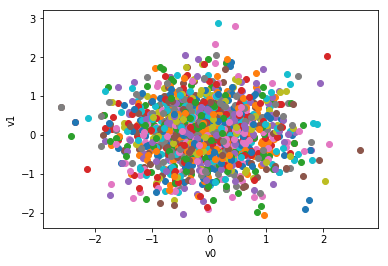

20までの累積寄与率: 0.3518592556938529
pc1=0 ------------


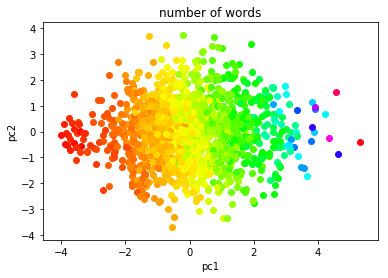

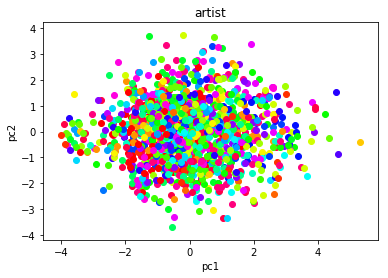

pc1=1 ------------


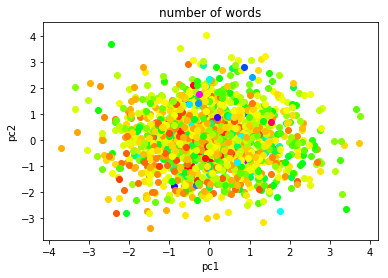

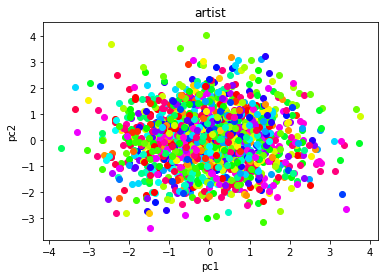

pc1=2 ------------


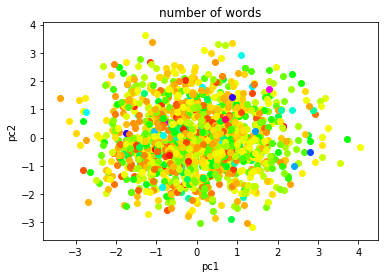

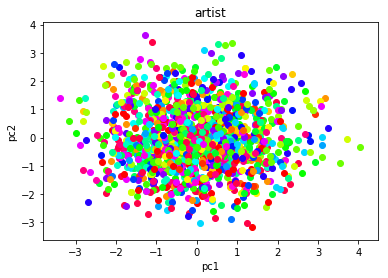

pc1=3 ------------


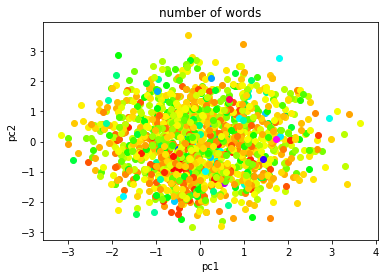

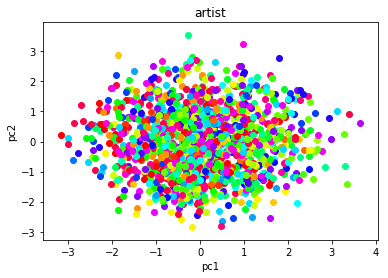

pc1=4 ------------


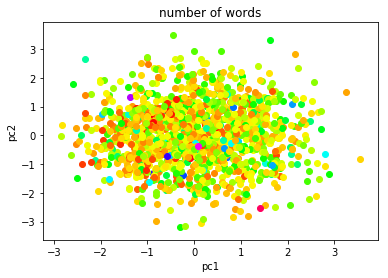

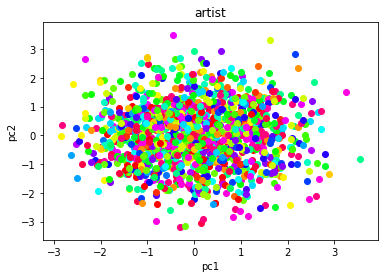

pc1=5 ------------


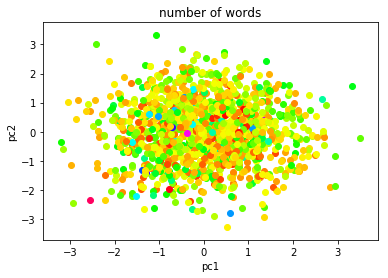

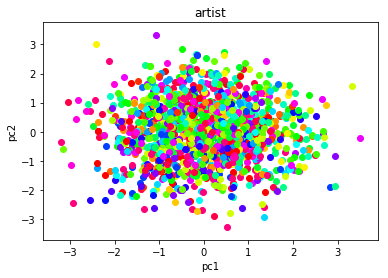

pc1=6 ------------


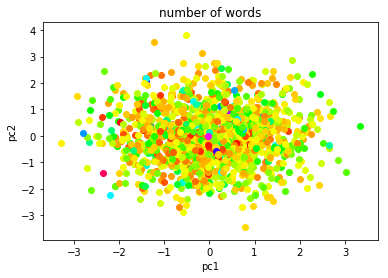

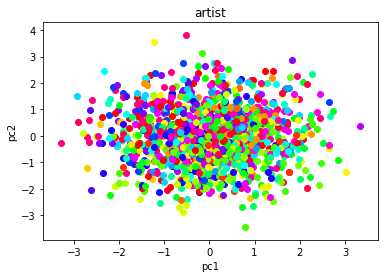

pc1=7 ------------


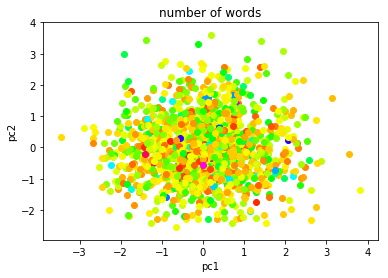

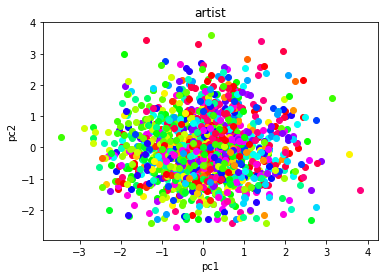

pc1=8 ------------


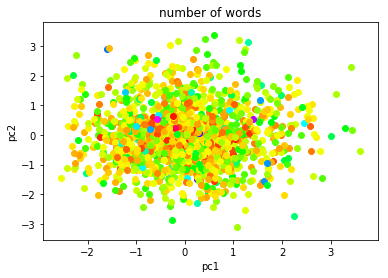

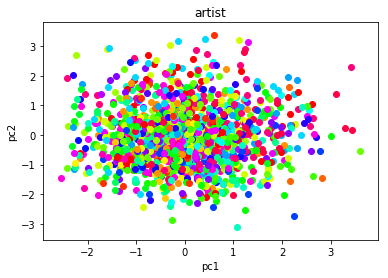

pc1=9 ------------


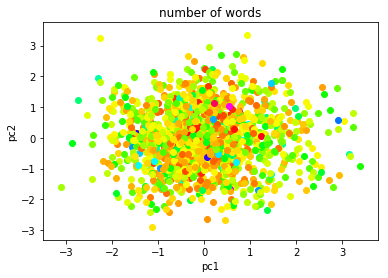

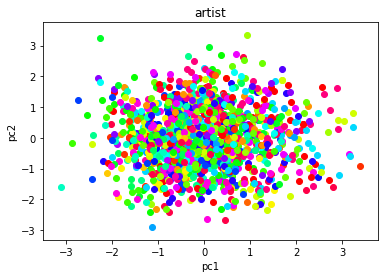

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np

import pickle
import matplotlib.cm as cm
print('aaa')


n = 20
pkl_file = 'result_0209_C024/vector.pkl'
cnt_file = 'data_utanet/test_cnt.txt'
art_file = 'data_utanet/test_a.txt'

# pkl file の情報
with open(pkl_file, 'rb') as f:
    vectors = pickle.load(f)

print(vectors.shape)
    
print('データセットの数: {}, 特徴量の次元: {}'.\
      format(vectors.shape[0], vectors.shape[1]))

# artist file の情報
with open(art_file, 'r') as f:
    art_list = [line.strip() for line in f.readlines()[:vectors.shape[0]]]
    n_art = len(set(art_list))
print('アーティストの数: {}'.format(n_art))

# word count file の情報
with open(cnt_file, 'r') as f:
    cnt_list = [int(line) for line in f.readlines()[:vectors.shape[0]]]
    
# 生の latent_vector がガウス分布に正規化されているか確認
print('raw ------------')
for v in vectors:
    plt.scatter(v[0], v[1])
    plt.title('')
    plt.xlabel('v0')
    plt.ylabel('v1')
plt.show()


# 主成分分析する
pca = PCA(n_components=n)
pca.fit(vectors)
pca_vectors = pca.fit_transform(vectors)


# 主成分の寄与率を出力する
#print('各次元の寄与率: {0}'.format(pca.explained_variance_ratio_))
print('{0}までの累積寄与率: {1}'.\
      format(n, sum(pca.explained_variance_ratio_)))

# アーティストごとに色を指定する
art_colors = {}
for i, art in enumerate(set(art_list)):
    art_colors[art] = float(i/n_art)

# 主成分をプロットする
for pc1 in range(10):
    pc2 = pc1 + 1
    print('pc1={} ------------'.format(pc1))

    for v, c in zip(pca_vectors, cnt_list):
        plt.scatter(v[pc1], v[pc2],
                    color=cm.hsv(float(c/max(cnt_list))))
    plt.title('number of words')
    plt.xlabel('pc1')
    plt.ylabel('pc2')
    plt.show()
    
    for v, c in zip(pca_vectors, art_list):
        plt.scatter(v[pc1], v[pc2],
                    color=cm.hsv(art_colors[c]))
    plt.title('artist')
    plt.xlabel('pc1')
    plt.ylabel('pc2')
    plt.show()
